In [1]:
!pip install shap

In [2]:
# Load useful libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [3]:
import pandas as pd
import numpy as np

diabetes_data=pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Separate Features and Target Variables
X = diabetes_data.drop(columns='Outcome')
y = diabetes_data['Outcome']

In [5]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
# Create Train & Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

In [7]:
# Build the model
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

In [8]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=2)

In [9]:
# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)

In [10]:
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       163
           1       0.60      0.72      0.66        68

    accuracy                           0.78       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.79      0.78      0.78       231



In [11]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)



c:\Users\Dell\miniconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
258,1,193,50,16,375,25.9,0.655,24
423,2,115,64,22,0,30.8,0.421,21
185,7,194,68,28,0,35.9,0.745,41
743,9,140,94,0,0,32.7,0.734,45
424,8,151,78,32,210,42.9,0.516,36
...,...,...,...,...,...,...,...,...
91,4,123,80,15,176,32.0,0.443,34
550,1,116,70,28,0,27.4,0.204,21
164,0,131,88,0,0,31.6,0.743,32
373,2,105,58,40,94,34.9,0.225,25


Variable Importance Plot - Global Interpretation


<Figure size 640x480 with 0 Axes>

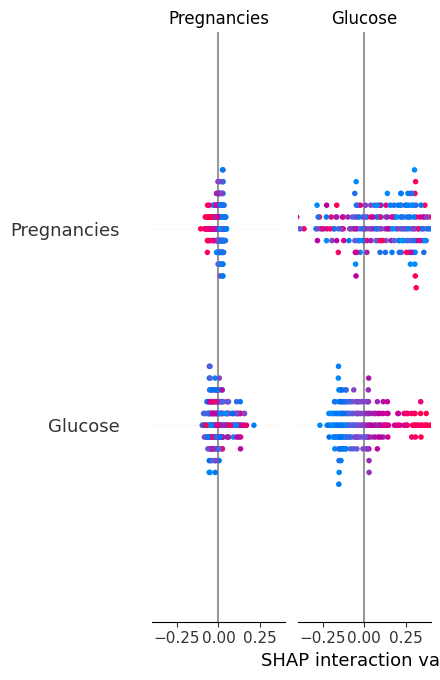

In [12]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

In [13]:
# shap.summary_plot(shap_values[1], X_test)

In [14]:
!pip install lime

In [15]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['Has diabetes', 'No diabetes']

# Get the feature names
feature_names = list(X_train.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       181
           1       0.41      0.66      0.50        50

    accuracy                           0.72       231
   macro avg       0.65      0.70      0.65       231
weighted avg       0.78      0.72      0.74       231



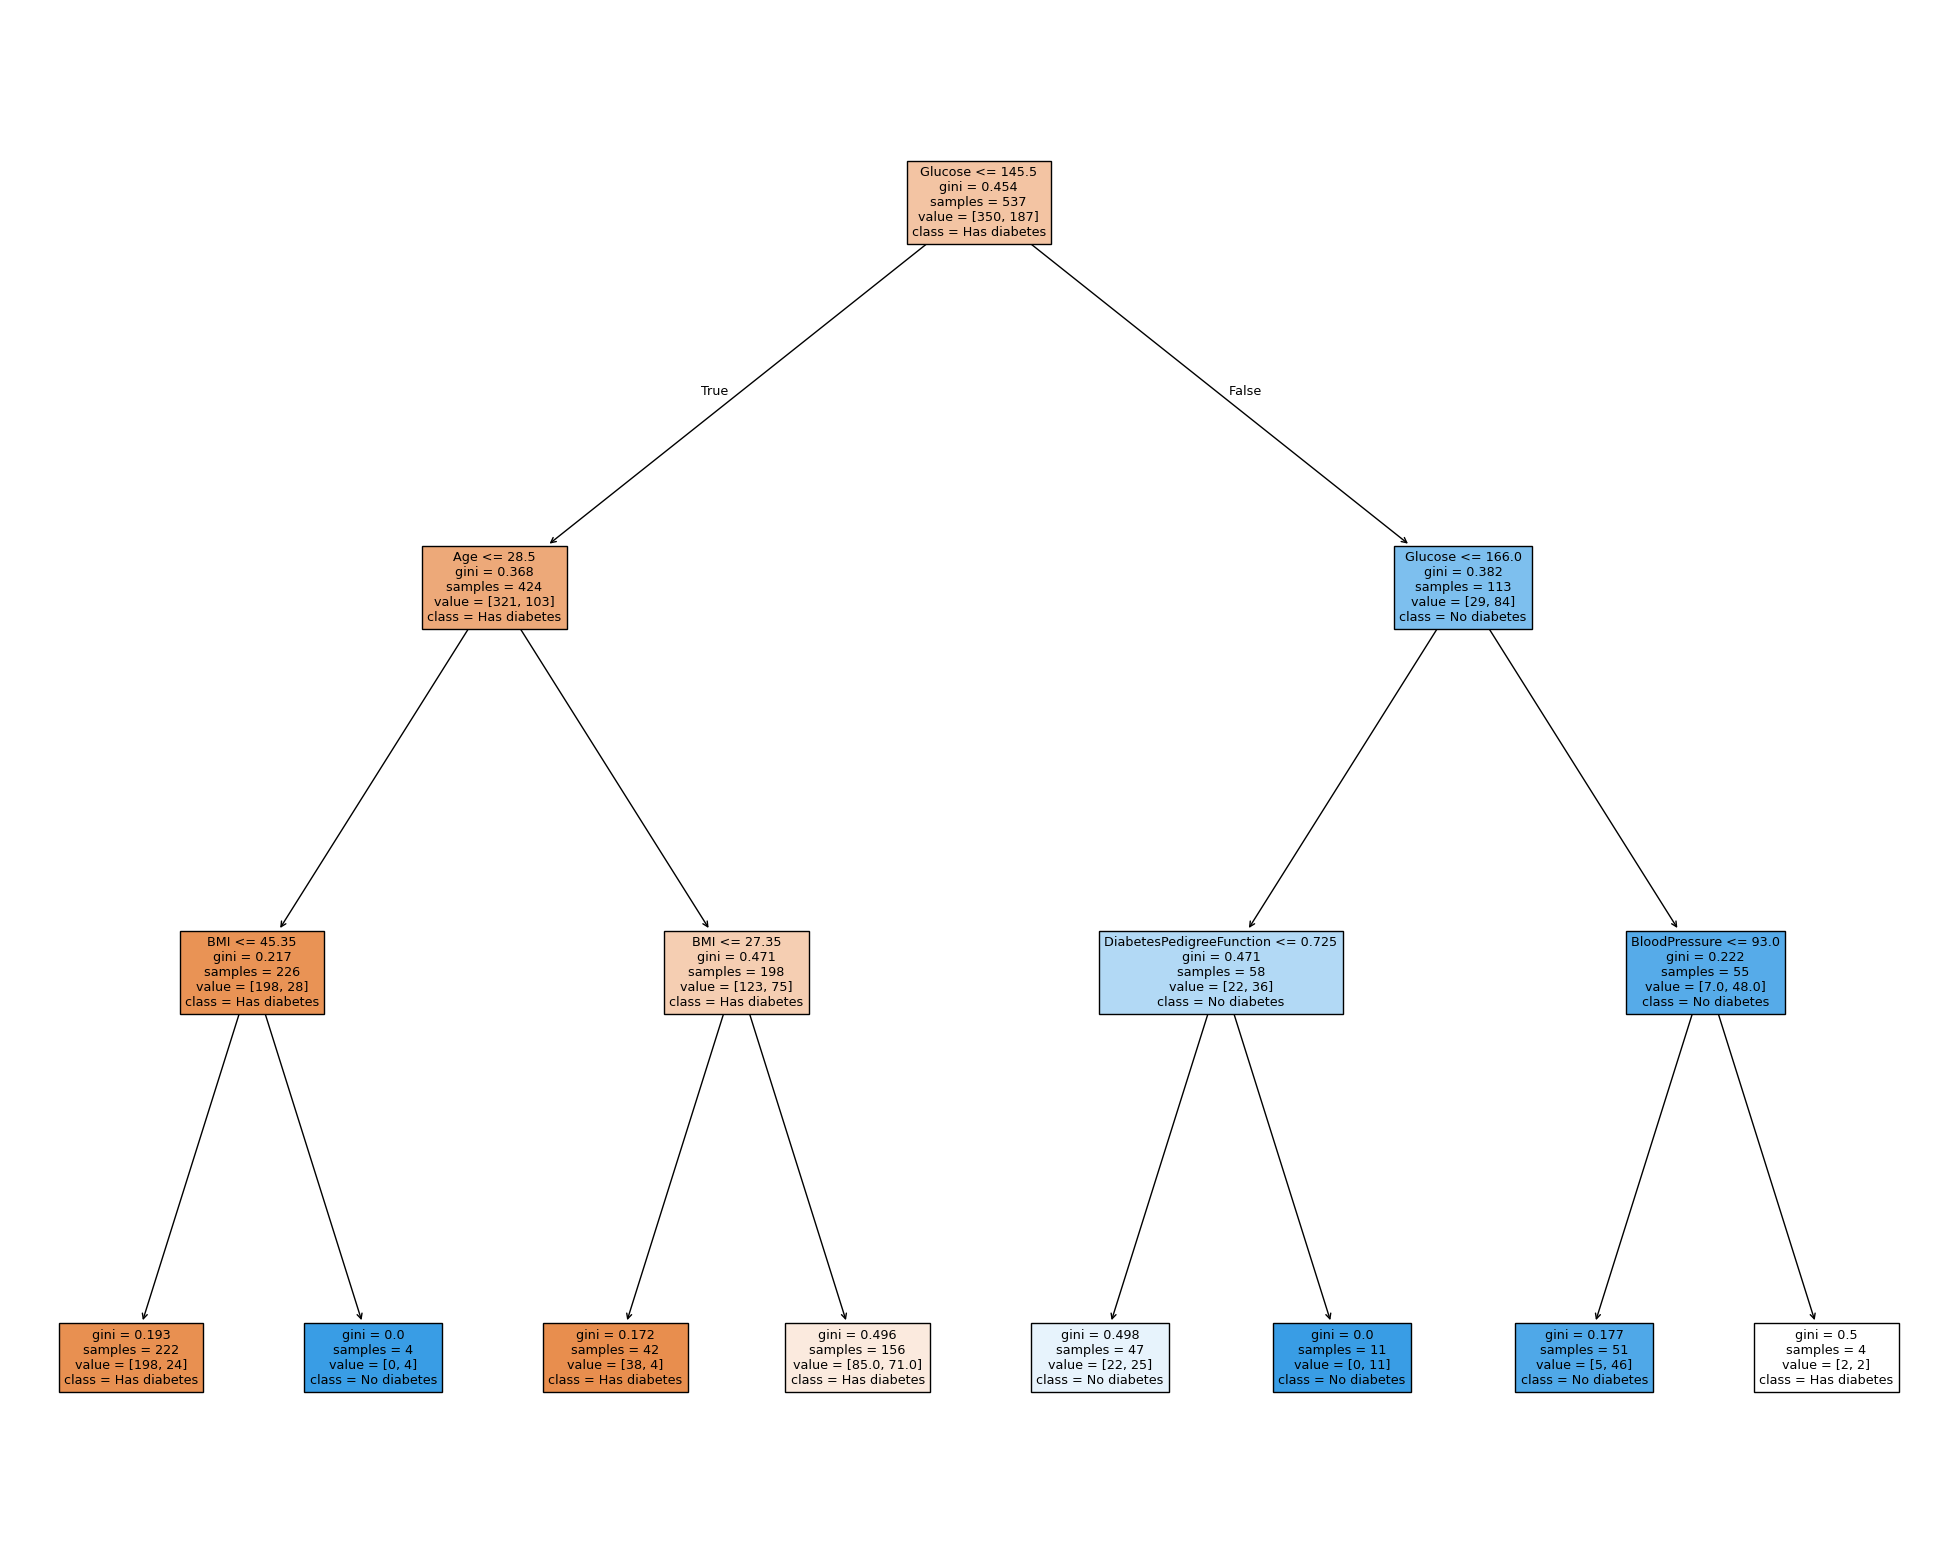

In [17]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)